In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
oligo_table = "../data/oligogenic/oligo_table.csv"
oligo_df = pd.read_csv(oligo_table)

In [5]:
oligo_df.vtype.value_counts()

Single hit    155475
Combo hit       1124
Name: vtype, dtype: int64

# Cumulative histplot

In [8]:
sns.color_palette("Reds", 15).as_hex()

['#feeae1',
 '#fee0d2',
 '#fdcdb9',
 '#fcbba1',
 '#fca689',
 '#fc9272',
 '#fb7d5d',
 '#fb694a',
 '#f5523a',
 '#ee3a2c',
 '#dc2924',
 '#ca181d',
 '#b71319',
 '#a30f15',
 '#840711']

In [11]:
list(sns.color_palette("Reds", 15).as_hex())[13]

'#a30f15'

In [5]:
sns.color_palette("Blues", 15).as_hex()

['#eaf3fb',
 '#deebf7',
 '#d2e3f3',
 '#c6dbef',
 '#b2d2e8',
 '#9dcae1',
 '#84bcdb',
 '#6aaed6',
 '#56a0ce',
 '#4191c6',
 '#3181bd',
 '#2070b4',
 '#1460a8',
 '#08509b',
 '#084082']

In [24]:
list(sns.color_palette("Blues", 15).as_hex())[13]

'#08509b'

(-0.05, 1.0)

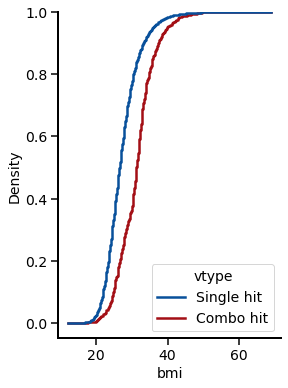

In [22]:


# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(4, 6))

sns.histplot(
    data=oligo_df,
    x="bmi", hue="vtype",
    hue_order=["Single hit", "Combo hit"],
    palette=["#08509b", "#a30f15", ],
    log_scale=False, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
    linewidth=2.5,ax=ax
)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-0.05, 1.0)

In [23]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british/data/oligogenic/single_combo_compare.pdf"
save_pdf(save_file, fig)

In [14]:
single_hit_pheno = oligo_df.loc[(oligo_df.vtype=="Single hit")]
combo_hit_pheno = oligo_df.loc[(oligo_df.vtype=="Combo hit")]

In [15]:
ttest_ind(single_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="less")

Ttest_indResult(statistic=-28.285644944392732, pvalue=7.203671833096603e-176)

In [19]:
kstest(single_hit_pheno.bmi, combo_hit_pheno.bmi, alternative="greater")

KstestResult(statistic=0.4055844018359533, pvalue=2.7248307473515343e-160)

# Other attempts

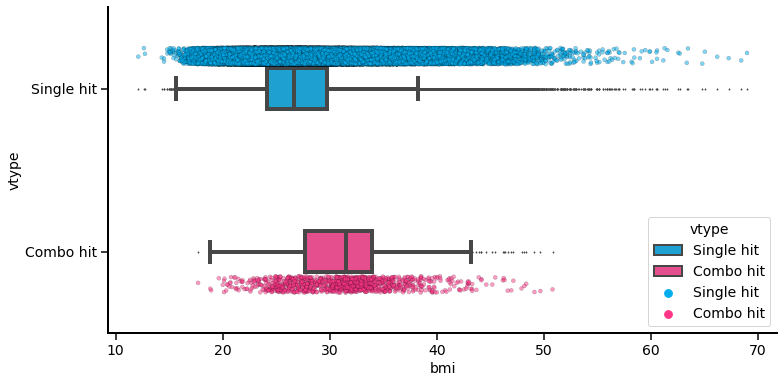

In [ ]:
boxdf = oligo_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(12, 6))

# Box Plot
sns_box = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d"
    y="vtype",
    x="bmi",
    hue="vtype",
    orient="h",
    order=["Single hit", "Combo hit"],
    hue_order=["Single hit", "Combo hit"],
    dodge=False, width=0.25, linewidth=4, fliersize=1, ax=ax)

sns_strip = sns.stripplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d"
    y="vtype",
    x="bmi",
    hue="vtype",
    order=["Single hit", "Combo hit"],
    hue_order=["Single hit", "Combo hit"],
    orient="h",
    s=4,
    alpha=0.5, ec='black', linewidth=0.25, facecolors="none", dodge=True, ax=ax # , jitter=True, 
    )



# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

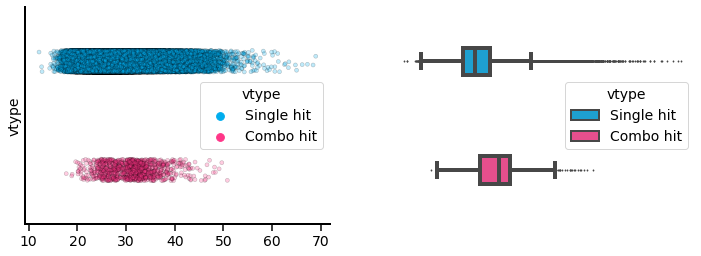

In [ ]:
boxdf = oligo_df

# Define Canvas
fig,ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Box Plot
sns_strip = sns.stripplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d"
    y="vtype",
    x="bmi",
    hue="vtype",
    order=["Single hit", "Combo hit"],
    hue_order=["Single hit", "Combo hit"],
    orient="h",
    s=4,
    alpha=0.25, ec='black', linewidth=0.5, jitter=True, facecolors="none", dodge=False, ax=ax[0]
    )

sns_box = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d"
    y="vtype",
    x="bmi",
    hue="vtype",
    orient="h",
    order=["Single hit", "Combo hit"],
    hue_order=["Single hit", "Combo hit"],
    dodge=False, width=0.25, linewidth=4, fliersize=1, ax=ax[1])


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
# ax.set_ylim((-0.025, 0.05))
# ax.set_ylabel('Percentage')
ax[0].set_yticklabels(["Single hit", "Combo hit",], rotation=0)
ax[0].set_xlabel("")
# ax[1].set_yticklabels(["Single hit", "Combo hit",], rotation=0)
ax[1].set_xticklabels("")
ax[1].set_xticks([])
ax[1].set_xlabel("")
ax[1].set_yticklabels("")
ax[1].set_yticks([])
ax[1].set_ylabel("")

# Remove Spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False);

# Violin plot

In [ ]:
violin_df = oligo_df

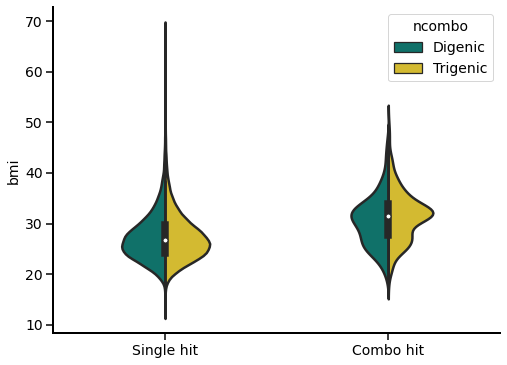

In [ ]:
fig = plt.figure(figsize=(8,6))
sns_ax = sns.violinplot(
    data=violin_df, x="vtype", y="bmi", 
    hue="ncombo", split=True,
    width=0.4, linewidth=2.5,
    palette=["#008176", "#eecc16"],  # "#eecc16", "#c1272d"
    hue_order= ["Digenic", "Trigenic"],
    )

ax = plt.gca()
sns_ax.set_xlabel("")
ax.spines[['right', 'top']].set_visible(False)


In [ ]:
single_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Digenic")]
combo_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Digenic")]

single_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Trigenic")]
combo_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Trigenic")]

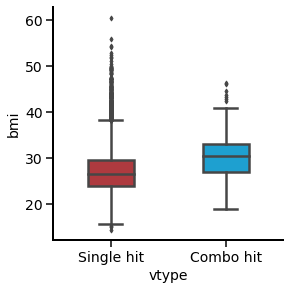

In [ ]:
boxdf = pd.concat((single_hit_pheno_c2, combo_hit_pheno_c2), axis=0)

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#c1272d", "#00ADEE"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    kind="box",
    x="vtype",
    y="bmi",
    orient="v",
    height=4,
    aspect=1,
    width=0.4,
    linewidth=2.5,
    fliersize=3.5
    )

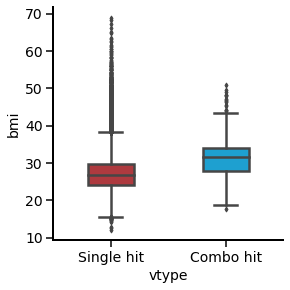

In [ ]:
boxdf = pd.concat((single_hit_pheno_c3, combo_hit_pheno_c3), axis=0)
# # Define Canvas
# fig,ax = plt.subplots(1, 1, figsize=(8, 8))

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#c1272d", "#00ADEE"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    kind="box",
    x="vtype",
    y="bmi",
    orient="v",
    height=4,
    aspect=1,
    width=0.4,
    linewidth=2.5,
    fliersize=3.5
    )

In [ ]:
ttest_ind(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi, alternative="less"), kstest(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi)

(Ttest_indResult(statistic=-10.400470428015863, pvalue=1.4621164126916534e-25),
 KstestResult(statistic=0.32861802904881665, pvalue=8.849310932759738e-24))

In [ ]:
ttest_ind(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi, alternative="less"), kstest(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi)

(Ttest_indResult(statistic=-26.510898062286397, pvalue=8.810889200687164e-155),
 KstestResult(statistic=0.4330296110581548, pvalue=2.5767301611682205e-149))